In [1]:

import clawpack.pyclaw as pyclaw 
import os, fnmatch
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from clawpack.pyclaw.solution import Solution
from clawpack.pyclaw import solution

    
# Finding the home directory
from os.path import expanduser
home = expanduser("~")
cwd = os.getcwd()

user_directory = cwd

dirName = '_output'  #directory in which the results lie
dirAddress = user_directory+"/"+dirName

print("Here are the output files: "+dirAddress)
files=fnmatch.filter(os.listdir(dirAddress), 'fort.q*' )
NbSim = len(files)
print("number of files: "+str(NbSim))

Here are the output files: /home/ancey/dossier_Clawpack/flume_Coursier/_output
number of files: 91


# Particular solution 

depth at x = 1000 m, h = 3.26 m


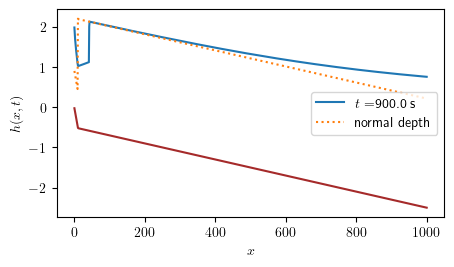

In [4]:
# Plot solution h(x, t)

frameNo   = 90
framesoln = solution.Solution(frameNo,  path=dirAddress,file_format='ascii')

x  = framesoln.state.grid.x.centers
h  = framesoln.state.q[0]
s  = framesoln.state.aux[0]
g  = 9.81 ; h0 = 1 ; c0 = np.sqrt(g*h0) ; tt = framesoln.t

# normal depth
hnor = np.where( x  >=10, (10/50/np.sqrt(0.002))**(2/3), 0)+\
            np.where(x  <10 , (10/50/np.sqrt(0.05))**(2/3) ,0)

print('depth at x = 1000 m, h = {:.2f} m'.format(h[-1]))

plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(5, 2.7))
 
ax.plot(x, h+s,  label=r'$ t = $'+str(framesoln.t)+" s")
ax.plot(x, hnor+s, ':',label='normal depth')
ax.plot(x, s, color = "brown")
ax.legend(loc='right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x, t)$');


# Animation

In [5]:
# Animation for depth 
def dambreak_animation():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]

    hmin = 0.0
    hmax =4
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure()
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$h(x, t)$',fontsize=14)
    axes.set_xlim((x[0], x[-1]))
    axes.set_ylim(( hmin, hmax))
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*hmax , '')
    #end wall
    ypoints = np.array([0,0.5])
    xpoints = np.array([1020,1020])
    axes.plot(xpoints, ypoints, 'k',linewidth = '20')

    
 
    def init():
        computed_line, = axes.plot(xsol[0][0], hsol[0][0], 'b')
        exact_line, = axes.plot(x_true[0], 0 , 'k--')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
 
    def fplot(n):
        tt = tps[n]
        if tt>0:
            htrue= np.where( x_true >=10, (10/50/np.sqrt(0.002))**0.667, 0)+\
            np.where(x_true <10 , (10/50/np.sqrt(0.05))**0.667 ,0) 
        else:
            htrue= np.where(x_true < 0 , 1,0)
        computed_line.set_data([xsol[n],], [hsol[n][:]])
        exact_line.set_data([x_true], [htrue])
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim = dambreak_animation( )
HTML(anim.to_jshtml()) 

2024-02-10 15:04:42,783 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## mp4

In [4]:
# Export mp4
anim.save('depth.mp4',fps=5,writer="ffmpeg",dpi=300)



## png

In [13]:
# Alternative to export snapshots

import matplotlib.colors as mcolors
def ExportAnimation():
    figs = []
 
    sol   = solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol  = np.empty((NbSim, sol.state.q.shape[1]))
    hsol  = np.empty((NbSim, sol.state.q.shape[1]))
    tps   = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]

    hmin = 0.0
    hmax = 4
    x    = sol.grid.x.centers
    L    = max(x)
    x0   = min(x)
    xmoy = (L+x0)/2
    # end wall
    ypoints = np.array([0,0.5])
    xpoints = np.array([1000,1000])
    # normal depth
    hnor    = np.where(x >= 10, (10/50/np.sqrt(0.002))**(2/3), 0)+\
              np.where(x <  10, (10/50/np.sqrt(0.05))**(2/3) ,0)

 
    for i in range(0,NbSim):
        fig = plt.figure()
        axes = plt.subplot(1, 1, 1)
        plt.rcParams['text.usetex'] = True
        axes.set_xlabel(r'$x$',fontsize=14)
        axes.set_ylabel(r'$h(x, t)$',fontsize=14)
        axes.set_xlim((x0,L))
        axes.set_ylim(( hmin, hmax))
        axes.plot(xpoints, ypoints, 'k',linewidth = '15')
        text = axes.text(L/2, 0.9*hmax , '')
        tt = tps[i]
        axes.text(200,2.5,r'$ h_n = {:.2f} $ m'.format(hnor[-1]))
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
        axes.set_title(" ")
        text = axes.text(xmoy, 0.9*hmax , '')
        text = axes.text(xmoy, 0.9*hmax , '')
        axes.fill_between(xsol[i] , hsol[i] , color = "lightskyblue")
        axes.plot(x , hnor, '--', color = "blue")
        figs.append(fig)
        plt.close(fig)
    return figs

from clawpack.visclaw import animation_tools
figures = ExportAnimation()
animation_tools.interact_animate_figs(figures)

In [14]:
# export figures for latex
mydir = 'Coursier'
if not os.path.isdir(mydir): os.mkdir(user_directory+"/"+mydir)
for i in range(len(figures)):
    figures[i].savefig(user_directory+'/'+mydir+'/Frame'+str(i)+'.png', bbox_inches='tight',dpi=300)